# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /home/matias/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]

# liste perso en plus
sw += ["où", "apparemment", "décidément", "déjà", "alors", "toutes", "leurs", "avant", "celui", "toute", "elles",
       "dés", "très", "peu"]
sw = set(sw)

# permet de savoir si un mot est dans ma liste de sw
print("avant" in sw)

True


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [61]:
# Choisir une année
year = 1898

In [62]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [63]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [64]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [65]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

"t mm « n dem. un ouvrier chaifccn- nier, (rar^.*fl3rï>..U0, rue NoVei-, S'chs'effcft'ii. 4T03 T rès pressé. On ton. pour Üstende ropuss^.CO fr. par lois,nourr.,log.. voyï* payé. 4. rue d’fcsjfrgifr. 4"

In [66]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [67]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"t mm « n dem. un ouvrier chaifccn- nier, (rar^.*fl3rï>..U0, rue NoVei-, S'chs'effcft'ii. 4T03 T rès pressé. On ton. pour Üstende ropuss^.CO fr. par lois,nourr.,log.. voyï* payé. 4. rue d’fcsjfrgifr. 4303 O n dem. d» chaque canton, voyageurs p* tissus, couvertures do lair.o et do coton. P.y:l.-t73.Âg.Kossel. 4311 Û n deiii.'fllle 43 a 44 a., p> COÜN.ist àid.mén.Librairie, 40. rue dés Bouchers. -13(57 O u detn. gaiç.cours.(p. ailer av.broucttç, !) fr. par sçm. {3,place do Louvain. 473 J I mportant"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [68]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [69]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1898_clean.txt!'

In [70]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'OUVRIER CHAIFCCN NIER RAR RUE NOVEI CHS EFFCFT RÈS PRESSÉ ÜSTENDE ROPUSS LOIS NOURR LOG VOYÏ PAYÉ RUE FCSJFRGIFR CHAQUE CANTON VOYAGEURS TISSUS COUVERTURES LAIR COTON KOSSEL DEIII FLLLE COÜN IST ÀID MÉN LIBRAIRIE RUE BOUCHERS DETN GAIÇ COURS AILER BROUCTTÇ SÇM PLACE LOUVAIN MPORTANTE VINAIGRERIC DÉNI VOYAGEUR ACTIF CLIENT BRUXELLES ENVIRONS ÉÇR FSN DENT VOYAGEUR PEAUX NGCS IIROSS ÇTE COIN BRIIX MIDI PRE UBM IORT GARÇ ÙMVH CHARBONS PROGRÈS DOM HIIE OUVRIÈRE FRIR LOU CHEMISELLE RUU ITINLEGIIEFN IS'

## Nuage de mots

### Afficher les termes les plus fréquents


In [71]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 4181), ('FILLE', 1083), ('DEMANDE', 901), ('MAISON', 892), ('ANS', 868), ('BRUXELLES', 844), ('PLACE', 809), ('PRIX', 614), ('CUIS', 555), ('BON', 507)]


### Créer, stocker et afficher le nuage de mots

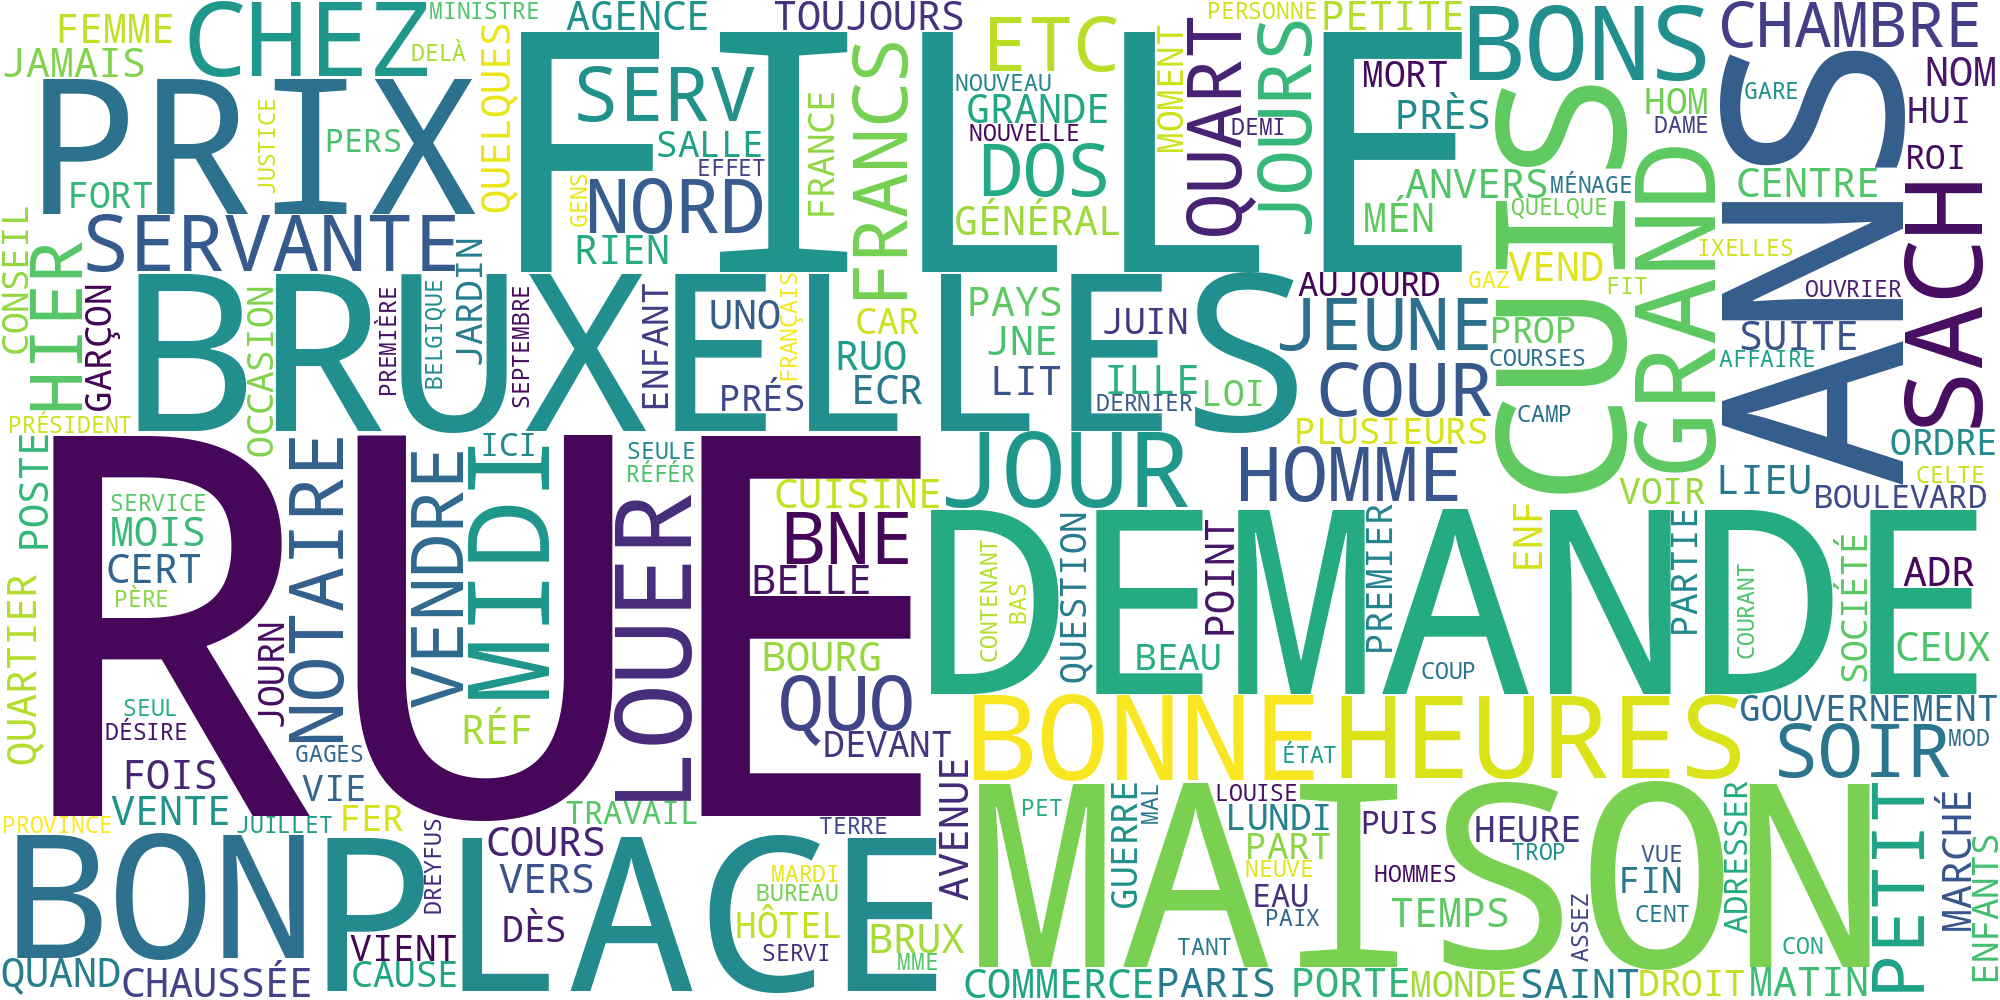

In [72]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))